<a href="https://colab.research.google.com/github/AsifRifat/Cricket-Outcome-Predictor/blob/main/CricketOutcomePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import necessary libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
import os
import pandas as pd
import numpy as np
import glob
import pickle
from pandas import DataFrame
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Merge all csv files of ODI matches**

In [ ]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [ ]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "odi.csv", index=False)

# **Import Dataset ODI**

In [62]:
%cd /content/drive/My\ Drive/cricket data

/content/drive/My Drive/cricket data


In [220]:
df1 = pd.read_csv("odi.csv")

In [221]:
df2 = pd.read_csv("t20.csv")

In [222]:
df3 = pd.read_csv("odi_matches.csv")

In [223]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df1.tail(5)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
1036705,1290881,2021/22,2021-11-26,"Wanderers Cricket Ground, Windhoek",2,46.1,Oman,Namibia,Zeeshan Maqsood,Kaleemullah,R Trumpelmann,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1036706,1290881,2021/22,2021-11-26,"Wanderers Cricket Ground, Windhoek",2,46.2,Oman,Namibia,Kaleemullah,Zeeshan Maqsood,R Trumpelmann,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1036707,1290881,2021/22,2021-11-26,"Wanderers Cricket Ground, Windhoek",2,46.3,Oman,Namibia,Zeeshan Maqsood,Kaleemullah,R Trumpelmann,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1036708,1290881,2021/22,2021-11-26,"Wanderers Cricket Ground, Windhoek",2,46.4,Oman,Namibia,Zeeshan Maqsood,Kaleemullah,R Trumpelmann,0,0,NaN,NaN,NaN,NaN,NaN,caught,Zeeshan Maqsood,NaN,NaN
1036709,1290881,2021/22,2021-11-26,"Wanderers Cricket Ground, Windhoek",2,46.5,Oman,Namibia,Bilal Khan,Kaleemullah,R Trumpelmann,0,0,NaN,NaN,NaN,NaN,NaN,caught,Bilal Khan,NaN,NaN


In [224]:
df2.head(5)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,211048,2004/05,2005-02-17,Eden Park,1,0.1,Australia,New Zealand,AC Gilchrist,MJ Clarke,DR Tuffey,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,211048,2004/05,2005-02-17,Eden Park,1,0.2,Australia,New Zealand,AC Gilchrist,MJ Clarke,DR Tuffey,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,211048,2004/05,2005-02-17,Eden Park,1,0.3,Australia,New Zealand,MJ Clarke,AC Gilchrist,DR Tuffey,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,211048,2004/05,2005-02-17,Eden Park,1,0.4,Australia,New Zealand,MJ Clarke,AC Gilchrist,DR Tuffey,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,211048,2004/05,2005-02-17,Eden Park,1,0.5,Australia,New Zealand,AC Gilchrist,MJ Clarke,DR Tuffey,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [225]:
df3.head(5)

,team1,runs,Inn,overs,rpo,Date,result,team2,Ground
0,Australia,240,1,50.0,4.80,6 Jan 1985,lost,West Indies,Melbourne
1,West Indies,241,2,44.5,5.37,6 Jan 1985,won,Australia,Melbourne
2,Sri Lanka,239,1,49.0,4.87,8 Jan 1985,lost,Australia,Sydney
3,Australia,240,2,46.2,5.17,8 Jan 1985,won,Sri Lanka,Sydney
4,Sri Lanka,197,1,50.0,3.94,10 Jan 1985,lost,West Indies,Hobart


# **Data Pre-processing**

In [ ]:
#Sort a data frame by "start_date", "match_id", "innings", "ball
#df1 = df1.sort_values(by = ["start_date", "match_id", "innings", "ball" ],axis = 0,ascending = [True, True, True, True])

In [ ]:
#Sort a data frame by "start_date", "match_id", "innings", "ball
#df2 = df2.sort_values(by = ["start_date", "match_id", "innings", "ball" ],axis = 0,ascending = [True, True, True, True])

In [124]:
#Keep only first innings of each ODI match
df1 = df1[df1.innings == 1]

In [ ]:
df1['batting_team'].unique()

array(['Pakistan', 'New Zealand', 'Australia', 'India', 'Zimbabwe',
       'South Africa', 'West Indies', 'Sri Lanka', 'Bangladesh',
       'England', 'United States of America', 'Kenya', 'Africa XI',
       'Asia XI', 'ICC World XI', 'Ireland', 'Bermuda', 'Canada',
       'Netherlands', 'Scotland', 'United Arab Emirates', 'Hong Kong',
       'Afghanistan', 'Papua New Guinea', 'Nepal', 'Namibia', 'Oman'],
      dtype=object)

In [ ]:
#Keep only consistent 12 teams
top12_teams = ['Australia', 'England', 'South Africa', 'West Indies', 'Sri Lanka','New Zealand',
             'Pakistan', 'India', 'Bangladesh', 'Zimbabwe', 'Ireland', 'Afghanistan']

df1 = df1[(df1['batting_team'].isin(top12_teams)) & (df1['bowling_team'].isin(top12_teams))]

# **Generate new columns**

In [226]:
sum_runs_off_bat_extras = df1["runs_off_bat"] + df1["extras"]

df1["runs"] = sum_runs_off_bat_extras

In [227]:
gr1 = df1.groupby(df1.ball.eq(0.1).cumsum())
df1["current_run"] = gr1.runs.cumsum()
df1["total_runs"] = gr1.current_run.transform("max")

In [228]:
df1['striker_run'] = df1.groupby(['match_id', 'striker'])['runs_off_bat'].cumsum()

In [230]:
m1 = df1['striker'].ne(df1['striker'].groupby(df1['match_id']).shift())
m2 = df1['striker'].eq(df1['non_striker'].shift())
m3 = df1['non_striker'].eq(df1['striker'].shift())
m = m1 & (m2 | m3)

df1['nonstriker_run'] = np.where(m, df1['striker_run'].shift(), np.nan)


m21 = df1['non_striker'] != df1['non_striker'].shift()
m22 = df1['non_striker'] != df1['striker'].shift()
df1['nonstriker_run'] = np.where(m21 & m22, 0, df1['nonstriker_run'])

m11 = df1['match_id'] != df1['match_id'].shift()
df1['nonstriker_run'] = np.where(m11, 0, df1['nonstriker_run'])

df1['nonstriker_run'] = df1['nonstriker_run'].ffill(downcast='infer')

In [334]:
df1['wicket']=(df1['wicket_type'].ne('retired hurt') & df1['wicket_type'].notna()).groupby(df1['match_id']).cumsum()

In [232]:
df1['runs_last10'] = df1.groupby('match_id',sort=False)['runs'].rolling(min_periods=1, window=60).sum().astype("int64").values

In [233]:
df1['wicket_last10'] = ((df1['wicket_type'].ne('retired hurt') & df1['wicket_type'].notna())
                      .groupby(df1['match_id'],sort=False)
                      .rolling(min_periods=1, window=60).sum().astype("int64")
                      .values)

# **Data cleaning**

In [134]:
df1.isnull().sum()

match_id                 0
season                   0
start_date               0
venue                    0
innings                  0
ball                     0
batting_team             0
bowling_team             0
current_run              0
wicket                   0
striker                  0
non_striker              0
bowler                   0
striker_run              0
nonstriker_run           0
wicket_type         547102
player_dismissed    547102
extras                   0
wides               549732
noballs             560240
byes                561593
legbyes             556671
penalty             562434
runs_last10              0
wicket_last10            0
total_runs               0
dtype: int64

In [234]:
#Drop unnecessary coulumns that don't have noticible impact on total runs
df1 = df1[['match_id','season','start_date','venue','innings','ball','batting_team','bowling_team','runs_off_bat','runs','current_run','wicket',
           'striker','non_striker','bowler','striker_run','nonstriker_run','wicket_type','player_dismissed','extras','wides',
           'noballs','byes','legbyes','penalty','runs_last10','wicket_last10','total_runs']]

# **Exploratory data analysis(EDA)**

In [235]:
df1.head(5)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,runs_off_bat,runs,current_run,wicket,striker,non_striker,bowler,striker_run,nonstriker_run,wicket_type,player_dismissed,extras,wides,noballs,byes,legbyes,penalty,runs_last10,wicket_last10,total_runs
0,64857,2003/04,2004-01-03,Eden Park,1,0.1,Pakistan,New Zealand,4,4,4,0,Yasir Hameed,Imran Farhat,DR Tuffey,4,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,4,0,229
1,64857,2003/04,2004-01-03,Eden Park,1,0.2,Pakistan,New Zealand,0,0,4,0,Yasir Hameed,Imran Farhat,DR Tuffey,4,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,4,0,229
2,64857,2003/04,2004-01-03,Eden Park,1,0.3,Pakistan,New Zealand,0,0,4,0,Yasir Hameed,Imran Farhat,DR Tuffey,4,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,4,0,229
3,64857,2003/04,2004-01-03,Eden Park,1,0.4,Pakistan,New Zealand,0,0,4,0,Yasir Hameed,Imran Farhat,DR Tuffey,4,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,4,0,229
4,64857,2003/04,2004-01-03,Eden Park,1,0.5,Pakistan,New Zealand,0,0,4,0,Yasir Hameed,Imran Farhat,DR Tuffey,4,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,4,0,229


In [321]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036710 entries, 0 to 1036709
Data columns (total 28 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   match_id          1036710 non-null  int64  
 1   season            1036710 non-null  object 
 2   start_date        1036710 non-null  object 
 3   venue             1036710 non-null  object 
 4   innings           1036710 non-null  int64  
 5   ball              1036710 non-null  float64
 6   batting_team      1036710 non-null  object 
 7   bowling_team      1036710 non-null  object 
 8   runs_off_bat      1036710 non-null  int64  
 9   runs              1036710 non-null  int64  
 10  current_run       1036710 non-null  int64  
 11  wicket            1036710 non-null  int64  
 12  striker           1036710 non-null  object 
 13  non_striker       1036710 non-null  object 
 14  bowler            1036710 non-null  object 
 15  striker_run       1036710 non-null  int64  
 16  

In [335]:
df1.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,match_id,innings,ball,runs_off_bat,runs,current_run,wicket,striker_run,nonstriker_run,extras,wides,noballs,byes,legbyes,penalty,runs_last10,wicket_last10,total_runs
count,1.03671e+06,1.03671e+06,1.03671e+06,1.03671e+06,1.03671e+06,1.03671e+06,1.03671e+06,1.03671e+06,1.03671e+06,1.03671e+06,23555,4017,1511,10667,11,1.03671e+06,1.03671e+06,1.03671e+06
mean,651399,1.4575,22.688,0.793645,0.842157,109.693,6.55451,23.1189,22.7924,0.0485121,1.20454,1.04132,2.045,1.36796,5,47.1781,1.44796,238.054
std,363613,0.498269,13.8239,1.25459,1.26079,74.3373,4.67727,24.435,24.1362,0.292962,0.795101,0.343965,1.31394,0.881757,0,18.6549,1.30589,62.8737
min,64857,1,0.1,0,0,0,0,0,0,0,1,1,1,1,5,0,0,0
25%,343733,1,10.6,0,0,49,2,5,4,0,1,1,1,1,5,36,0,198
50%,567372,1,22.1,0,0,100,6,15,15,0,1,1,1,1,5,47,1,240
75%,1.03022e+06,2,34.2,1,1,161,10,34,34,0,1,1,4,1,5,58,2,280
max,1.29088e+06,4,49.9,7,7,481,20,264,264,6,5,5,4,5,5,181,11,481


In [333]:
df1.loc[df1['wicket_type'] == 'obstructing the field']

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,runs_off_bat,runs,current_run,wicket,striker,non_striker,bowler,striker_run,nonstriker_run,wicket_type,player_dismissed,extras,wides,noballs,byes,legbyes,penalty,runs_last10,wicket_last10,total_runs
85316,235831,2005/06,2006-02-06,Arbab Niaz Stadium,2,43.2,Pakistan,India,0,0,289,15,Inzamam-ul-Haq,Younis Khan,S Sreesanth,16,12,obstructing the field,Inzamam-ul-Haq,0,NaN,NaN,NaN,NaN,NaN,63,4,311
528802,567371,2012/13,2013-03-21,Kingsmead,2,1.3,Pakistan,South Africa,1,1,2,9,Imran Farhat,Mohammad Hafeez,LL Tsotsobe,1,0,obstructing the field,Mohammad Hafeez,0,NaN,NaN,NaN,NaN,NaN,57,3,236
572134,685733,2013/14,2013-11-27,St George's Park,1,44.3,Pakistan,South Africa,0,0,261,7,Anwar Ali,Umar Akmal,DW Steyn,7,42,obstructing the field,Anwar Ali,0,NaN,NaN,NaN,NaN,NaN,82,4,262
697236,743979,2015,2015-09-05,Lord's,2,25.4,England,Australia,0,0,141,10,BA Stokes,EJG Morgan,MA Starc,10,27,obstructing the field,BA Stokes,0,NaN,NaN,NaN,NaN,NaN,54,2,245
971662,1206059,2019/20,2019-12-08,Sharjah Cricket Stadium,2,21.2,United States of America,United Arab Emirates,0,0,82,12,Aaron Jones,XM Marshall,Rohan Mustafa,36,34,obstructing the field,XM Marshall,0,NaN,NaN,NaN,NaN,NaN,44,1,206
1004623,1252069,2020/21,2021-03-10,Sir Vivian Richards Stadium,1,21.1,Sri Lanka,West Indies,0,0,112,1,MD Gunathilaka,P Nissanka,KA Pollard,55,1,obstructing the field,MD Gunathilaka,0,NaN,NaN,NaN,NaN,NaN,49,2,232


In [336]:
df1.corr()

,match_id,innings,ball,runs_off_bat,runs,current_run,wicket,striker_run,nonstriker_run,extras,wides,noballs,byes,legbyes,penalty,runs_last10,wicket_last10,total_runs
match_id,1.000000,0.002633,0.004468,0.021389,0.017365,0.040553,0.002507,0.042887,0.039314,-0.016861,-0.028233,-0.017409,0.040897,0.013688,NaN,0.066867,0.002726,0.095118
innings,0.002633,1.000000,-0.089698,-0.006237,-0.005570,-0.059574,0.831793,-0.025148,-0.023973,0.002741,0.012647,-0.007337,0.141298,0.029682,NaN,0.218764,0.208480,-0.250783
ball,0.004468,-0.089698,1.000000,0.096850,0.095423,0.932742,0.286593,0.341422,0.341639,-0.004091,0.021653,0.040517,-0.227045,-0.116044,NaN,0.302815,0.008494,0.168284
runs_off_bat,0.021389,-0.006237,0.096850,1.000000,0.972882,0.142315,-0.004523,0.171868,0.059324,-0.095523,NaN,-0.074072,NaN,NaN,NaN,0.181680,-0.053399,0.109798
runs,0.017365,-0.005570,0.095423,0.972882,1.000000,0.142232,-0.004117,0.167946,0.056399,0.137311,0.999162,0.166569,0.998294,0.999880,NaN,0.184328,-0.050831,0.108996
current_run,0.040553,-0.059574,0.932742,0.142315,0.142232,1.000000,0.232616,0.413256,0.405312,0.002659,0.028117,0.058531,-0.227581,-0.098634,NaN,0.479433,-0.011779,0.349031
wicket,0.002507,0.831793,0.286593,-0.004523,-0.004117,0.232616,1.000000,-0.029937,-0.027760,0.001649,0.018461,0.016496,0.022434,-0.011635,NaN,0.170990,0.372502,-0.349698
striker_run,0.042887,-0.025148,0.341422,0.171868,0.167946,0.413256,-0.029937,1.000000,0.173125,-0.013235,0.015850,-0.007097,-0.029130,-0.059041,NaN,0.353654,-0.357650,0.285860
nonstriker_run,0.039314,-0.023973,0.341639,0.059324,0.056399,0.405312,-0.027760,0.173125,1.000000,-0.011331,0.017624,0.010226,-0.079763,-0.051388,NaN,0.330740,-0.357503,0.275384
extras,-0.016861,0.002741,-0.004091,-0.095523,0.137311,0.002659,0.001649,-0.013235,-0.011331,1.000000,0.999162,0.917544,0.998294,0.999880,NaN,0.015243,0.009918,-0.001127


# Histogram

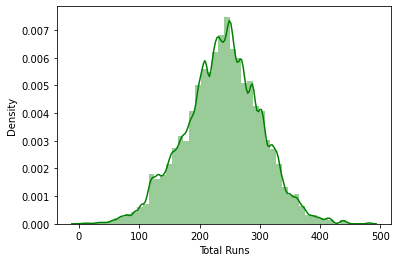

In [238]:
sns.distplot(df1['total_runs'], color = 'green', axlabel = 'Total Runs')

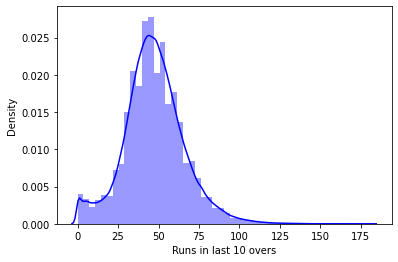

In [239]:
sns.distplot(df1['runs_last10'],color = 'blue', axlabel='Runs in last 10 overs')

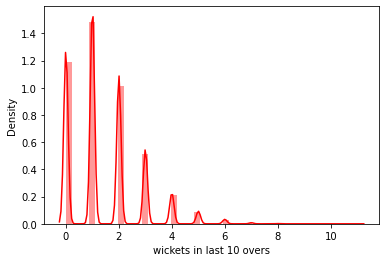

In [240]:
sns.distplot(df1['wicket_last10'], color= 'red', axlabel ='wickets in last 10 overs')

# **Top 10 most played vennue**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

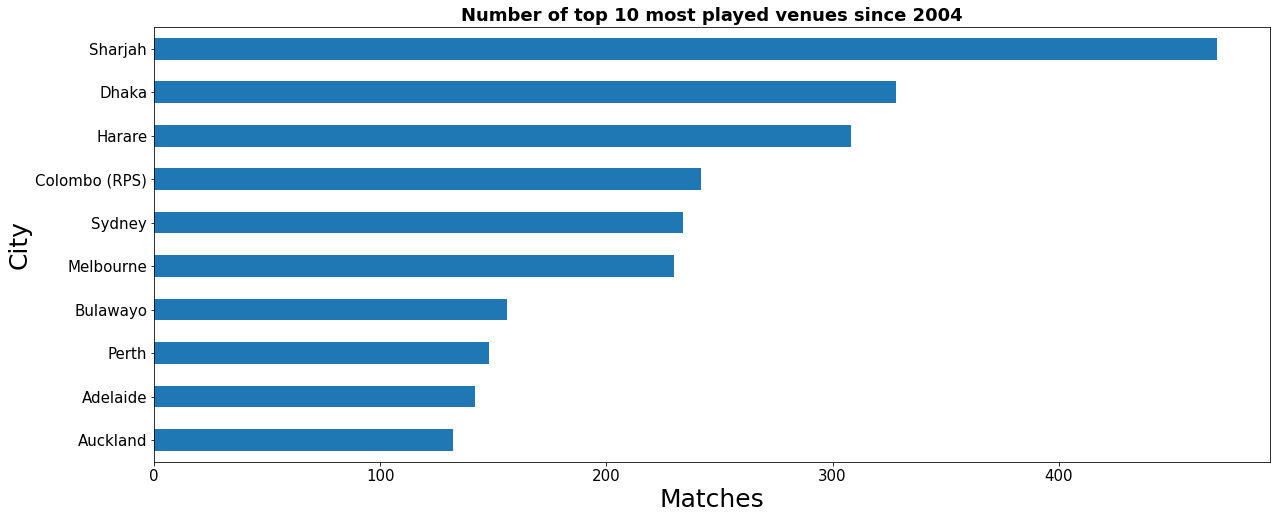

In [345]:
plt.title("Number of top 10 most played venues since 2004",fontsize=18,fontweight="bold")
p1 = df3.Ground.value_counts().head(10).plot(kind='barh',figsize=[20,8])
p1.invert_yaxis()
plt.ylabel("City", size = 25)
plt.xlabel("Matches", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

(array([  0., 100., 200., 300., 400., 500., 600.]),
 <a list of 7 Text major ticklabel objects>)

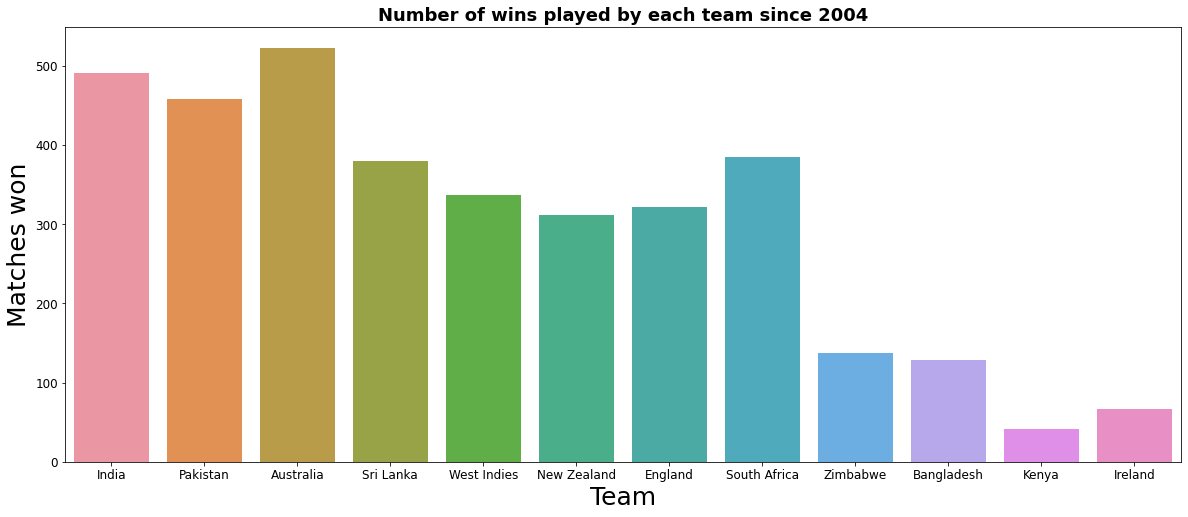

In [346]:
plt.figure(figsize=(20,8))
sns.countplot('team1', data = df3[df3.result=='won'], order=pd.value_counts(df3['team1']).iloc[:12].index)
plt.title("Number of wins played by each team since 2004",fontsize=18,fontweight="bold")
plt.ylabel("Matches won", size = 25)
plt.xlabel("Team", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)



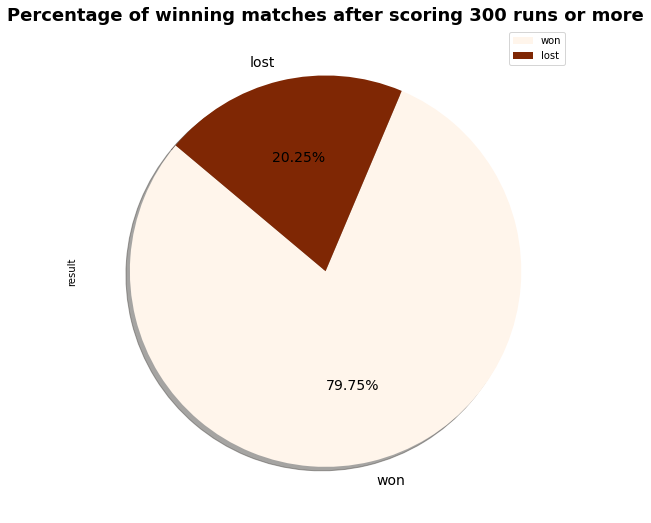

In [309]:
plt.title("Percentage of winning matches after scoring 300 runs or more",fontsize=18,fontweight="bold")
df3[df3.runs >=300].result.value_counts().plot(kind='pie',autopct='%.2f%%', fontsize=14, 
                                               figsize=(9,9), shadow=True, startangle=140, legend=True, cmap='Oranges')

# **Different types of dismissals**

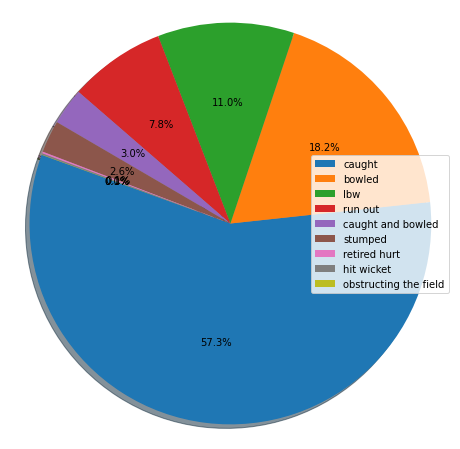

In [314]:
dis=df1[df1.wicket_type.notna()].wicket_type.value_counts()
plt.figure(figsize=(8,8))
plt.pie(dis,autopct='%1.1f%%', startangle=160, shadow=True)
plt.axis('equal')
plt.legend( loc = 'right', labels=dis.index)
plt.show()

In [315]:
#Pivot Table for total runs per season of a batsman
batsman_season=pd.pivot_table(df1,index=["season"],values=["runs_off_bat"],columns=['striker'],aggfunc='sum',fill_value=0)
#batsman_season['best_season_runs']=batsman_season.max(axis=1)

#batsman_season['best_season_batsman']=batsman_season.apply(lambda x:batsman_season.columns[x.argmax()],axis=1)
batsman_season= batsman_season.agg(['idxmax','max'], axis=1).mask(lambda x: x['max'].eq(0))
batsman_season['season'] = batsman_season.index

#best_season_batsman refers to the batsman who scored the highest total runs in all the matches in a seson.

In [316]:
batsman_season['idxmax']=[('2003/04 AC Gilchrist'),
('2004 KC Sangakkara'),
('2004/05 KP Pietersen'),
('2005 AC Gilchrist'),
('2005/06 KC Sangakkara'),
('2006 RR Sarwan'),
('2006/07  ML Hayden'),
('2007  SR Tendulkar'),
('2007/08 Mohammad Yousuf'),
('2008 MS Dhoni'),
('2008/09 V Sehwag'),
('2009 MJ Clarke'),
('2009/10 RT Ponting'),
('2010 AJ Strauss'),
('2010/11 HM Amla'),
('2011 SR Watson'),
('2011/12 V Kohli'),
('2012 IR Bell'),
('2012/13 TM Dilshan'),
('2013 KC Sangakkara'),
('2013/14 V Kohli'),
('2014 F du Plessis'),
('2014/15 KC Sangakkara'),
('2015 KS Williamson'),
('2015/16 RG Sharma'),
('2016 LD Chandimal'),
('2016/17 DA Warner'),
('2017 V Kohli') ,
('2017/18 V Kohli') ,
('2018 Imam-ul-Haq'),
('2018/19 V Kohli'),
('2019 SD Hope'),
('2019/20 SD Hope'),
('2020 SW Billings'),
('2020/21 PR Stirling'),
('2021 JN Malan'),
('2021/22 K Verreynne')]

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 <a list of 9 Text major ticklabel objects>)

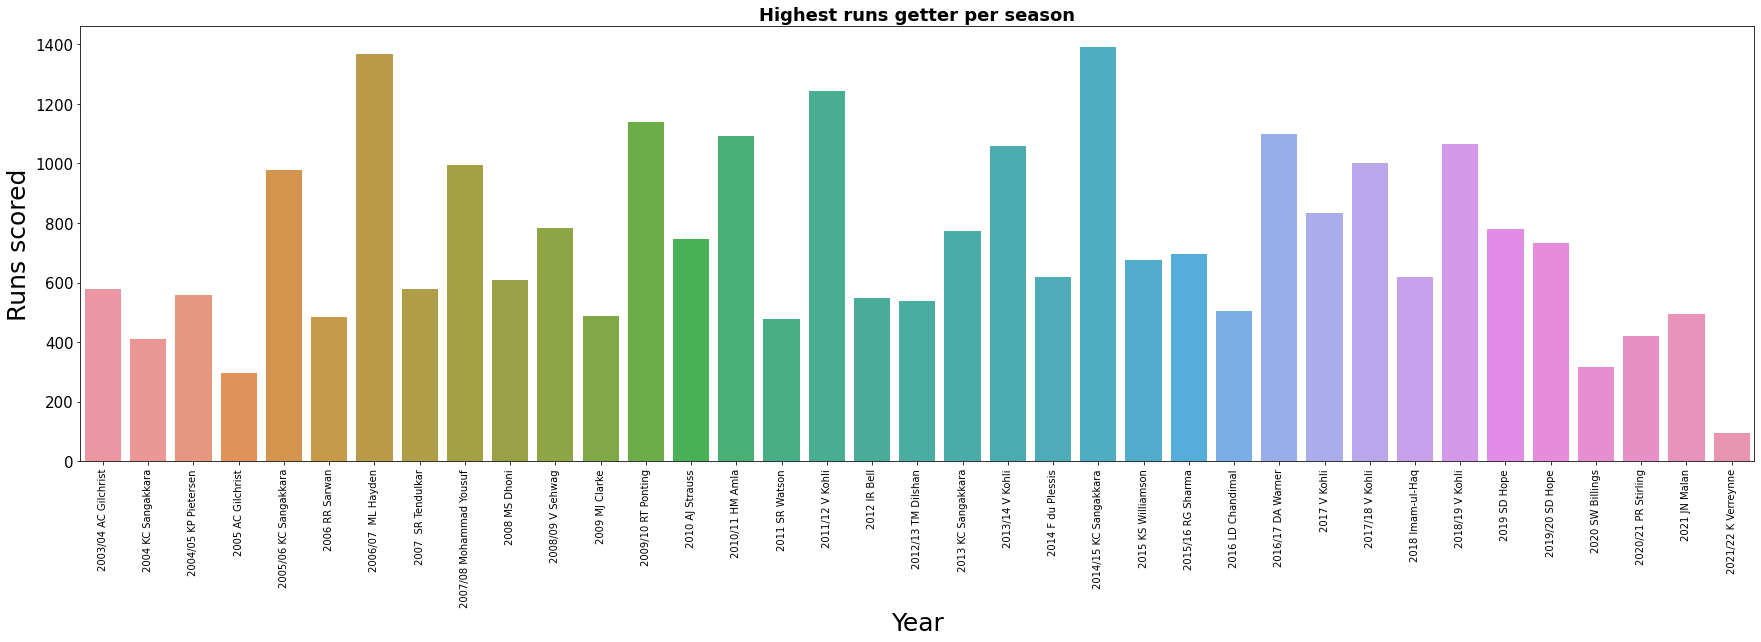

In [318]:
plt.figure(figsize=(30,8))
sns.barplot(x=batsman_season['idxmax'], y=batsman_season['max'], hue=None, data=batsman_season)
plt.title("Highest runs getter per season",fontsize=18,fontweight="bold")
plt.ylabel("Runs scored", size = 25)
plt.xlabel("Year", size = 25)
plt.xticks(size = 10,rotation=90)
plt.yticks(size = 15)

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.]), <a list of 8 Text major ticklabel objects>)

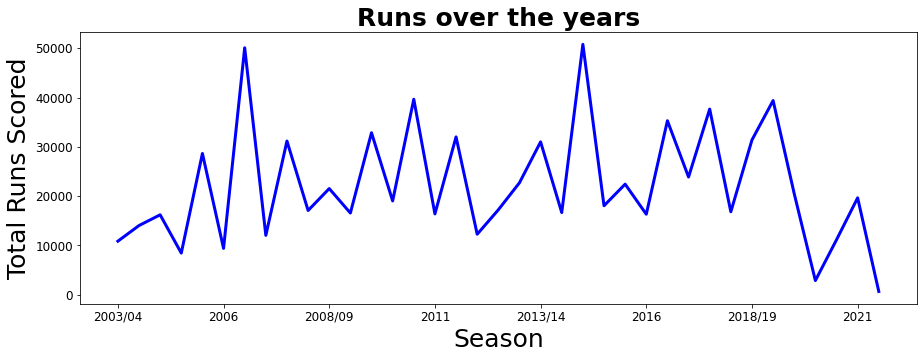

In [317]:
df1.groupby('season')['runs_off_bat'].sum().plot(kind = 'line', linewidth = 3, figsize =(15,5),color = 'blue')
plt.title("Runs over the years",fontsize= 25, fontweight = 'bold')
plt.xlabel("Season", size = 25)
plt.ylabel("Total Runs Scored", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.]),
 <a list of 8 Text major ticklabel objects>)

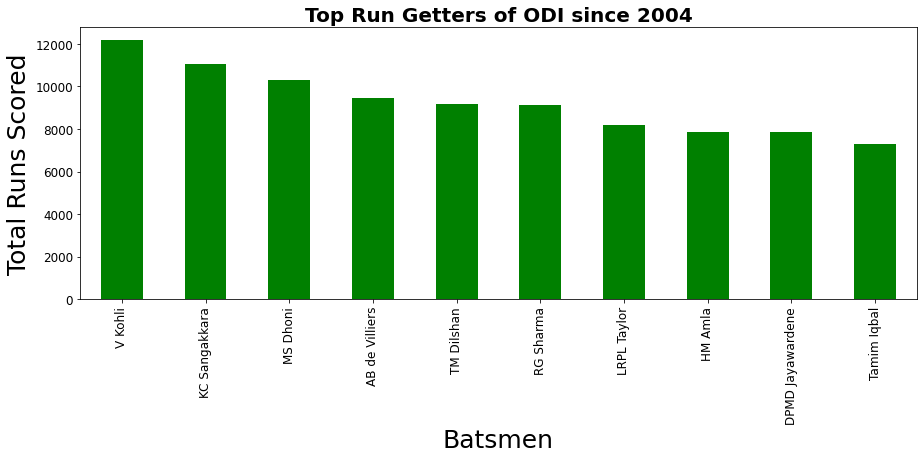

In [347]:
#let's plot the top 10 run getter so far in ODI
df1.groupby('striker')['runs_off_bat'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'green',
                                                                                            figsize = (15,5))
plt.title("Top Run Getters of ODI since 2004", fontsize = 20, fontweight = 'bold')
plt.xlabel("Batsmen", size = 25)
plt.ylabel("Total Runs Scored", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 9 Text major ticklabel objects>)

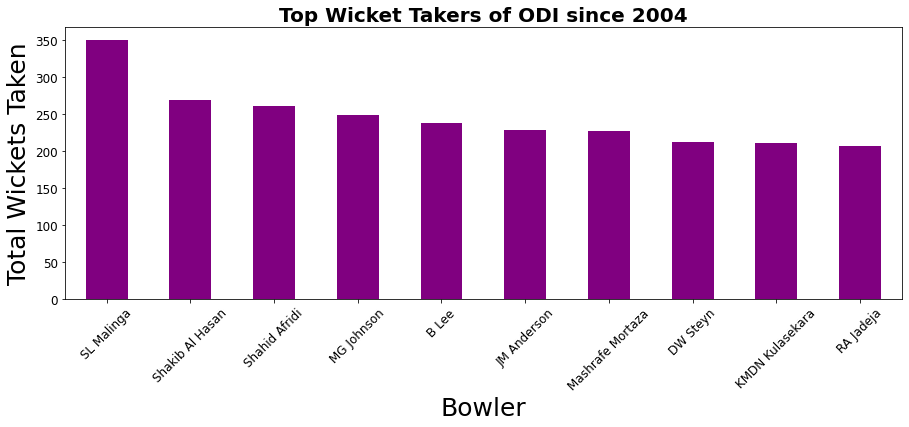

In [344]:
df1.groupby('bowler')['wicket_type'].count().sort_values(ascending = False).head(10).plot(kind = 'bar', 
                                                color = 'purple', figsize = (15,5))
plt.title("Top Wicket Takers of ODI since 2004", fontsize = 20, fontweight = 'bold')
plt.xlabel("Bowler", size = 25)
plt.ylabel("Total Wickets Taken", size = 25)
plt.xticks(size = 12,rotation=45)
plt.yticks(size = 12)

In [364]:
#We will consider players who have played 10 or more seasons
no_of_balls = pd.DataFrame(df1.groupby('striker')['ball'].count()) #total number of matches played by each batsman
runs = pd.DataFrame(df1.groupby('striker')['runs_off_bat'].sum()) #total runs of each batsman
seasons = pd.DataFrame(df1.groupby('striker')['season'].nunique()) #season = 1 implies played only 1 season

batsman_strike_rate = pd.DataFrame({'balls':no_of_balls['ball'],'run':runs['runs_off_bat'],'season':seasons['season']})
batsman_strike_rate.reset_index(inplace = True)

batsman_strike_rate['strike_rate'] = batsman_strike_rate['run']/batsman_strike_rate['balls']*100
highest_strike_rate = batsman_strike_rate[batsman_strike_rate.season.isin([10,12])][['season','striker','strike_rate']].sort_values(by = 'strike_rate',
                                                                                                            ascending = False)

highest_strike_rate.head(10)

,season,striker,strike_rate
42,10,AD Russell,128.447205
528,10,Imad Wasim,107.524537
749,12,LE Plunkett,106.560636
1138,10,Rashid Khan,101.578947
94,12,AU Rashid,98.947368
576,10,JDS Neesham,96.037464
38,10,AD Hales,94.077901
442,12,GP Swann,90.476190
856,12,MR Marsh,89.316239
348,12,DR Smith,88.181818


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 8 Text major ticklabel objects>)

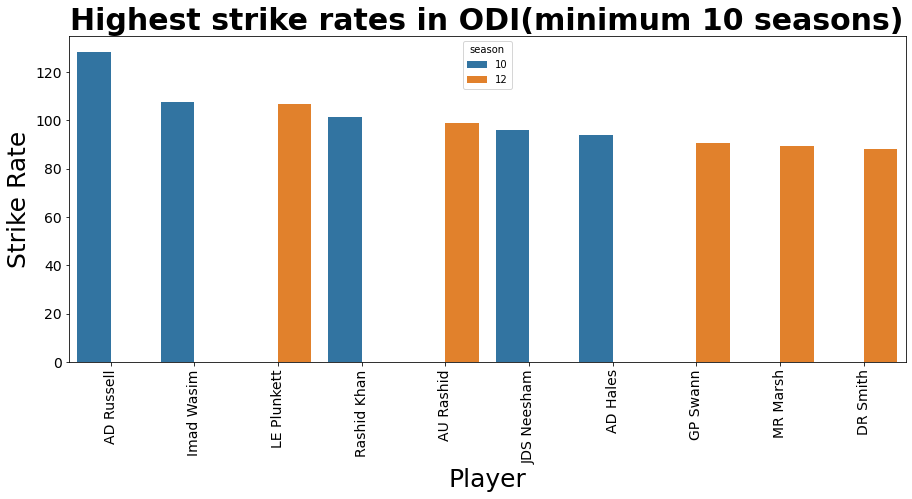

In [368]:
plt.figure(figsize = (15,6))
sns.barplot(x='striker', y='strike_rate', data = highest_strike_rate.head(10), hue = 'season')
plt.title("Highest strike rates in ODI(minimum 10 seasons)",fontsize= 30, fontweight = 'bold')
plt.xlabel("Player", size = 25)
plt.ylabel("Strike Rate", size = 25)
plt.xticks(size = 14, rotation=90)
plt.yticks(size = 14)

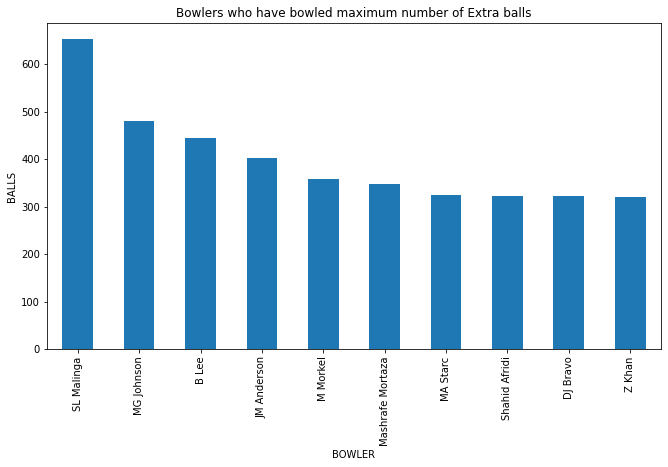

,SL Malinga,MG Johnson,B Lee,JM Anderson,M Morkel,Mashrafe Mortaza,MA Starc,Shahid Afridi,DJ Bravo,Z Khan
bowler,654,481,444,402,359,348,324,322,322,321


In [369]:
extra = df1[df1['extras']!=0]['bowler'].value_counts()[:10]
extra.plot(kind='bar', figsize=(11,6), title='Bowlers who have bowled maximum number of Extra balls')

plt.xlabel('BOWLER')
plt.ylabel('BALLS')
plt.show()

extra = pd.DataFrame(extra)
extra.T

